<a href="https://colab.research.google.com/github/udfds/DataLab/blob/master/exercises/365datascience/time_series_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the relevant packages


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the Data and Pre-processing 

In [0]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [0]:
df_comp['market_value']=df_comp.ftse

In [0]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df_training, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## LLR Test

In [0]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## The DF-Test

In [0]:
sts.adfuller(df_training.market_value)

(-1.9041551418836864,
 0.33010893277028336,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '10%': -2.5670769326348926,
  '5%': -2.8621166146845334},
 54854.15304507557)

## Using Returns

In [0]:
df_training['returns'] = df_training.market_value.pct_change(1).mul(100)
df_training = df_training.iloc[1:]

sts.adfuller(df_training.returns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(-12.770265719497182,
 7.798058336040345e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 15696.7672456975)

## ACF and PACF for Returns

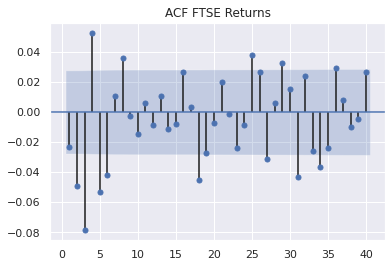

In [0]:
sgt.plot_acf(df_training.returns, lags=40, zero=False, title='ACF FTSE Returns');

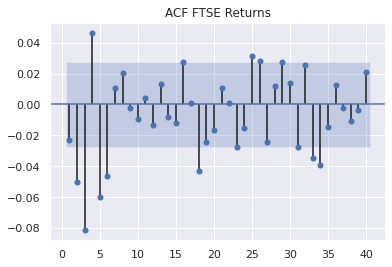

In [0]:
sgt.plot_pacf(df_training.returns, lags=40, zero=False, method=('ols'), title='ACF FTSE Returns');

## AR(1) for Returns

In [0]:
model_return_1 = ARMA(df_training.returns, order=(1,0))

model_return_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 03 Apr 2020   AIC                          15865.497
Time:                        15:23:02   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models for Returns

In [0]:
model_return = ARMA(df_training.returns, order=(2,0))

print(model_return.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 03 Apr 2020   AIC                          15854.911
Time:                        15:28:05   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     

In [0]:
model_return = ARMA(df_training.returns, order=(3,0))

print(model_return.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Fri, 03 Apr 2020   AIC                          15823.477
Time:                        15:28:10   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     

In [0]:
model_return = ARMA(df_training.returns, order=(4,0))

print(model_return.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Fri, 03 Apr 2020   AIC                          15814.661
Time:                        15:28:15   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

In [0]:
model_return = ARMA(df_training.returns, order=(5,0))

print(model_return.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 03 Apr 2020   AIC                          15798.779
Time:                        15:28:23   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     

In [0]:
model_return = ARMA(df_training.returns, order=(6,0))

print(model_return.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 03 Apr 2020   AIC                          15789.890
Time:                        15:28:26   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

In [0]:
model_return = ARMA(df_training.returns, order=(7,0))

print(model_return.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 03 Apr 2020   AIC                          15791.294
Time:                        15:28:32   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     

In [0]:
model_return = ARMA(df_training.returns, order=(8,0))

print(model_return.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(8, 0)   Log Likelihood               -7885.599
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 03 Apr 2020   AIC                          15791.199
Time:                        15:28:42   BIC                          15856.410
Sample:                    01-10-1994   HQIC                         15814.050
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.370      0.171      -0.008       0.046
ar.L1.returns    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.returns    -0.0507      0.014     

In [32]:
model_1 = ARMA(df_training.returns, order=(1,0))
model_2 = ARMA(df_training.returns, order=(2,0))

print('Model 1 x 2',LLR_test(model_1, model_2))

model_1 = ARMA(df_training.returns, order=(2,0))
model_2 = ARMA(df_training.returns, order=(3,0))

print('Model 2 x 3',LLR_test(model_1, model_2))

model_1 = ARMA(df_training.returns, order=(3,0))
model_2 = ARMA(df_training.returns, order=(4,0))

print('Model 3 x 4',LLR_test(model_1, model_2))

model_1 = ARMA(df_training.returns, order=(4,0))
model_2 = ARMA(df_training.returns, order=(5,0))

print('Model 4 x 5',LLR_test(model_1, model_2))

model_1 = ARMA(df_training.returns, order=(5,0))
model_2 = ARMA(df_training.returns, order=(6,0))

print('Model 5 x 6',LLR_test(model_1, model_2))

model_1 = ARMA(df_training.returns, order=(6,0))
model_2 = ARMA(df_training.returns, order=(7,0))

print('Model 6 x 7',LLR_test(model_1, model_2))

model_1 = ARMA(df_training.returns, order=(7,0))
model_2 = ARMA(df_training.returns, order=(8,0))

print('Model 7 x 8',LLR_test(model_1, model_2))

Model 1 x 2 0.0
Model 2 x 3 0.0
Model 3 x 4 0.001
Model 4 x 5 0.0
Model 5 x 6 0.001
Model 6 x 7 0.44
Model 7 x 8 0.148


## Normalizing Values

In [33]:
benchmark = df_training.market_value.iloc[0]
df_training['normalizing'] = df_training.market_value.div(benchmark).mul(100)

sts.adfuller(df_training.normalizing)

(-1.892871013267235,
 0.3354222074330072,
 6,
 5013,
 {'1%': -3.431655136974821,
  '10%': -2.567076993884522,
  '5%': -2.8621167297421373},
 19553.90073102193)

In [34]:
benchmark_returns = df_training.returns.iloc[0]
df_training['normalizing_return'] = df_training.returns.div(benchmark_returns).mul(100)

sts.adfuller(df_training.normalizing_return)

(-12.770265719497242,
 7.798058336038161e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 80114.49116124898)

## Normalized Returns

In [35]:
model_returns_1 = ARMA(df_training.returns, order=(1,0))

model_returns_1_result = model_returns_1.fit()

model_returns_1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 03 Apr 2020   AIC                          15865.497
Time:                        16:21:54   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

In [36]:
model_returns_2 = ARMA(df_training.returns, order=(2,0))

model_returns_2_result = model_returns_2.fit()

model_returns_2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 03 Apr 2020   AIC                          15854.911
Time:                        16:21:57   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [37]:
model_returns_7 = ARMA(df_training.returns, order=(7,0))

model_returns_7_result = model_returns_7.fit()

model_returns_7_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 03 Apr 2020   AIC                          15791.294
Time:                        16:22:53   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2270           -0.0000j            5.2270           -0.0000
-----------------------------------------------------------------------------
"""

## Analysing the Residuals

In [38]:
model_returns_6 = ARMA(df_training.returns, order=(6,0))
result_returns_6 = model_returns_6.fit()

df_training['result_returns'] = result_returns_6.resid

print('Mean', df_training.result_returns.mean())
print('Var', df_training.result_returns.var())

Mean -5.372412302788232e-05
Var 1.3559802110696517


In [39]:
sts.adfuller(df_training.result_returns)

(-70.78380171410286,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '10%': -2.567076626752987,
  '5%': -2.8621160400844468},
 15692.570834395005)

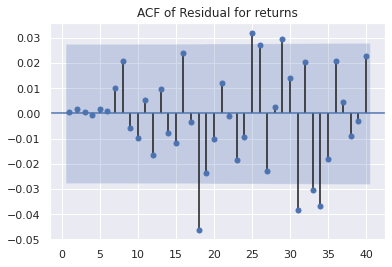

In [43]:
sgt.plot_acf(df_training.result_returns, zero=False, lags=40, title='ACF of Residual for returns');

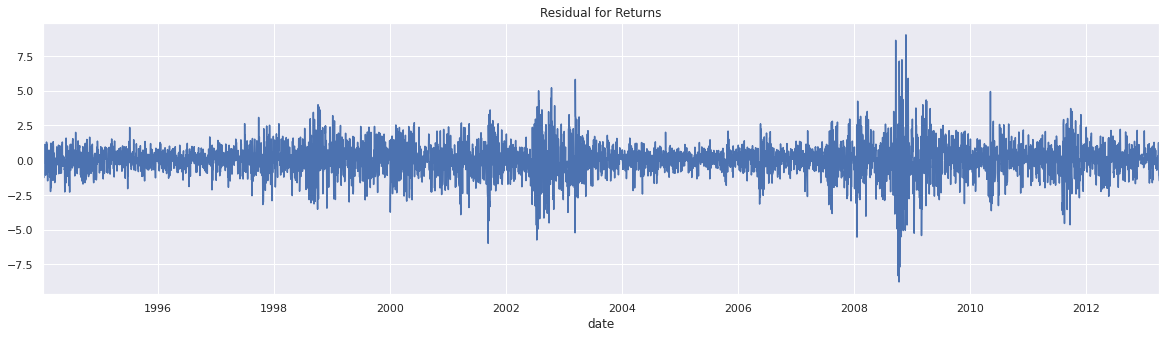

In [45]:
df_training.result_returns.plot(figsize=(20,5), title='Residual for Returns');